In [51]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset including features such as symbol, date, close, adj_close, volume can downloaded from finance.yahoo.com. Historical stock prices of Edwards Lifesciences Corporation (EW) are pulled within a time span from 2000-03-26 to 2017-09-09.**


In [53]:
data=pd.read_csv('/content/drive/MyDrive/EW-MAX.csv')

In [54]:
data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [56]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64


In [57]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

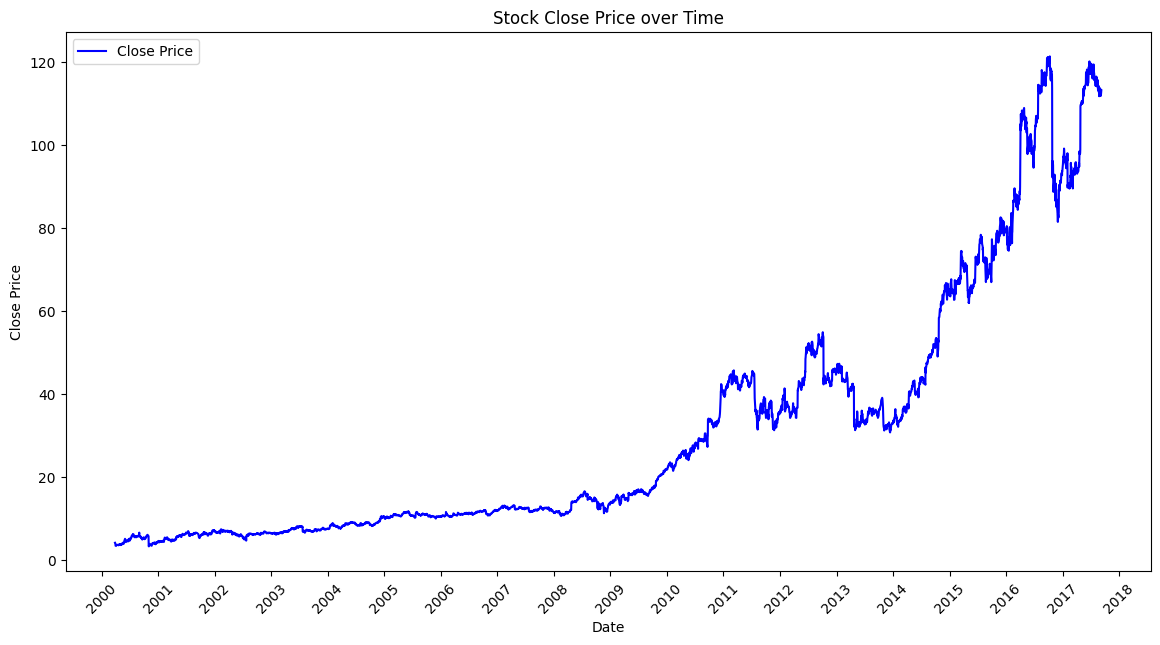

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Plotting stock Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')

# Set title and labels
plt.title('Stock Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Formatting the x-axis to show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to display year only

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


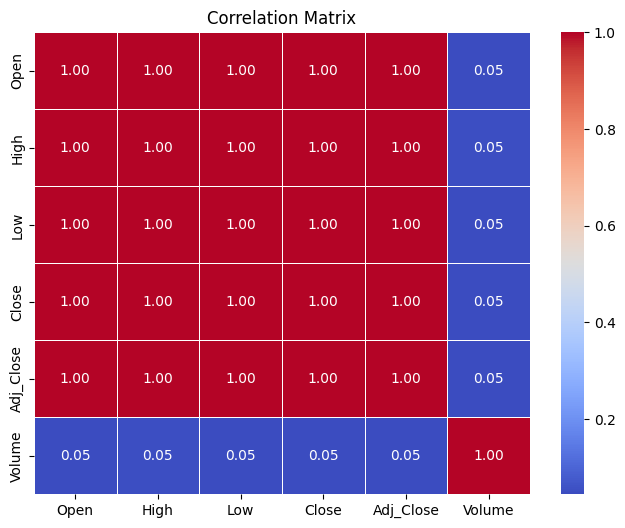

In [59]:
# Calculate the correlation matrix
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']].corr()

# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


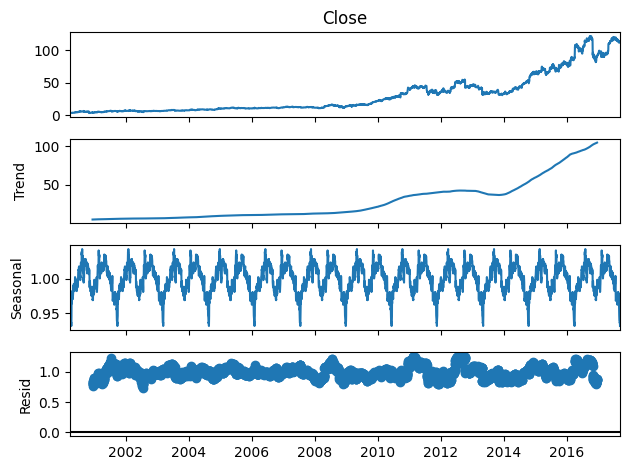

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
data['Date'] = pd.to_datetime(data['Date'])  # Ensure Date is datetime format
data.set_index('Date', inplace=True)

result = seasonal_decompose(data['Close'], model='multiplicative', period=365)
result.plot()
plt.show()


In [61]:
X

array([[4.15625000e+00, 3.81250000e+00, 3.81250000e+00, 3.67560000e+06],
       [4.12500000e+00, 4.00000000e+00, 4.12500000e+00, 1.07760000e+06],
       [4.03125000e+00, 3.95312500e+00, 4.00000000e+00, 4.37200000e+05],
       ...,
       [1.12489998e+02, 1.10250000e+02, 1.12029999e+02, 2.13670000e+06],
       [1.12900002e+02, 1.12000000e+02, 1.12459999e+02, 1.25160000e+06],
       [1.14790001e+02, 1.12010002e+02, 1.12300003e+02, 1.61170000e+06]])

In [62]:
y

array([  4.125   ,   4.015625,   4.      , ..., 112.230003, 112.339996,
       113.190002])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [65]:
tf.__version__

'2.17.1'

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
import tensorflow as tf

# Build the model
ann = tf.keras.models.Sequential()

# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add another hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Add the output layer (no activation function for regression)
ann.add(tf.keras.layers.Dense(units=1))

# Compile the model
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
# Train the model
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1542.9917 - mae: 27.8297 - val_loss: 423.9925 - val_mae: 14.8981
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210.2952 - mae: 10.5744 - val_loss: 55.0806 - val_mae: 5.4620
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.7944 - mae: 5.0479 - val_loss: 27.4791 - val_mae: 3.7868
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.7101 - mae: 3.4602 - val_loss: 12.2247 - val_mae: 2.2938
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0835 - mae: 1.9235 - val_loss: 4.6715 - val_mae: 1.3982
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8700 - mae: 1.1859 - val_loss: 2.5609 - val_mae: 1.1238
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8599 - mae: 1.0083 - val_loss: 1.4108 - val_mae: 0.8591
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0991 - mae: 0.7575 - val_loss: 0.8720 - val_mae: 0.6548
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 

In [69]:
# Evaluate the model on the test set
test_loss, test_mae = ann.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Mean Absolute Error: {test_mae}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1527 - mae: 0.2263 
Test Loss: 0.17024695873260498
Test Mean Absolute Error: 0.23260140419006348


In [70]:
y_pred = ann.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [71]:
results = pd.DataFrame({'Actual Close': y_test, 'Predicted Close': y_pred.flatten()})

# Print the first few rows
print("Actual vs Predicted Close Values:")
print(results)


Actual vs Predicted Close Values:
     Actual Close  Predicted Close
0      119.720001       119.600616
1       46.700001        46.192646
2       12.967500        12.835664
3        6.100000         5.917232
4       77.550003        77.909195
..            ...              ...
874     16.327499        16.131496
875     67.644997        67.101547
876     93.400002        92.813194
877     10.335000        10.290440
878     19.235001        19.447950

[879 rows x 2 columns]
